In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline




In [ ]:
Location="datasets1/datasets/diamonds.csv"
df = pd.read_csv(Location)

df.head()

In [18]:
#drop a column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#create bins
bins=[0,3001,10001,20000]
group_names=['value', 'nice','luxury']
df['shopper']=pd.cut(df['price'],bins,labels=group_names)
df.head(10)

In [20]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
result = smf.ols('price ~ carat + depth + table',data=df).fit()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:32:16   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.3e+04    390.918     33.264      0.000    1.22e+04    1.38e+04
carat       7858.7705     14.151    555.356      0.000    7831.035    7886.506
depth       -151.2363      4.820    -31.378      0.000    -160.683    -141.789
table       -104.4728      3.141    -33.259      0.000    -110.630     -98.316
==============================================================================
Omnibus:                    14107.737   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154392.067
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                      11.070   Cond. No.                     5.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#remove depth and table from regression, not very correlated
result = smf.ols('carat~ price', data=df).fit()
result.summary()

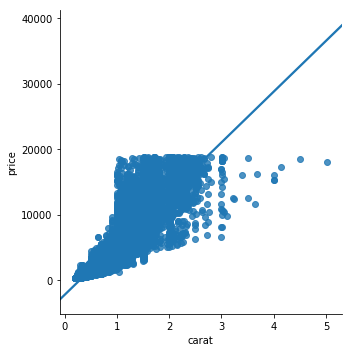

In [27]:
#make a scatterplot
sns.lmplot(x='carat', y='price', data=df)

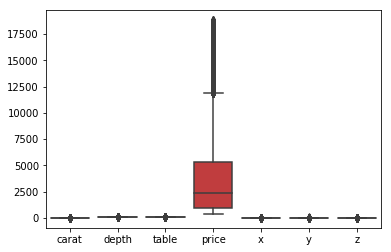

In [28]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

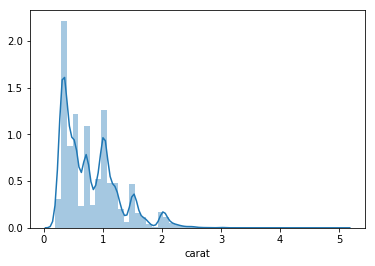

In [31]:
sns.distplot(df['carat'])

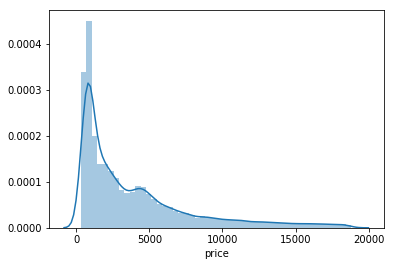

In [32]:
sns.distplot(df['price'])

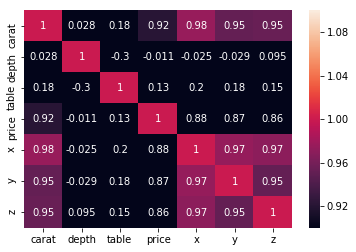

In [35]:
corr = df.corr()

sns.heatmap(corr, vmin=1, annot=True)